# Rainfall Prediction - Weather Forecasting

Problem Statement:
    
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
1) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

2) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Importing the dataset

In [3]:
df1=pd.read_csv("weather.csv")
df1

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

# Exploratory Data Analysis

In [4]:
df1.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df1.sample()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6946  2010-12-12  PerthAirport     19.3     36.6       0.0         10.6   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6946      12.2         ENE           52.0        ENE  ...        23.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6946         15.0       1007.3       1002.8       1.0       1.0     28.9   

      Temp3pm  RainToday  RainTomorrow  
6946     34.8         No            No  

[1 rows x 23 columns]

In [6]:
df1.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [7]:
df1.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df1.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Checking Null Values

In [9]:
df1.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Except two columns, remaining all columns had missing values.

In [10]:
# Seperating Numerical and Categorical Columns

# Checking for categorical columns
categorical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n", categorical_col,"\n")

# Checking for Numerical columns
numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_col.append(i)
print("Numeical columns are:\n", numerical_col)

Categorical columns are:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

Numeical columns are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [11]:
#lets check value counts of categorical column

for i in df1[categorical_col]:
    print(df1[i].value_counts())
    print('_______________________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
_______________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_______________________________
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
_______________________________
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype:

In [12]:
#lets check value counts of numerical values

for i in df1[numerical_col]:
    print(df1[i].value_counts().sort_index())
    print('___________________________')

-2.0     2
-1.7     1
-1.5     1
-1.4     1
-1.3     2
        ..
 27.5    2
 27.8    1
 28.0    1
 28.3    1
 28.5    1
Name: MinTemp, Length: 285, dtype: int64
___________________________
8.2     1
8.3     1
8.4     1
8.8     2
9.4     1
       ..
43.5    1
43.6    2
44.8    1
44.9    1
45.5    2
Name: MaxTemp, Length: 331, dtype: int64
___________________________
0.0      5299
0.1        28
0.2       406
0.4       177
0.5         7
         ... 
142.2       1
168.4       1
225.0       2
240.0       1
371.0       1
Name: Rainfall, Length: 250, dtype: int64
___________________________
0.0      12
0.2      36
0.4      24
0.6      47
0.7       1
         ..
37.0      2
47.0      2
55.4      2
59.2      2
145.0     2
Name: Evaporation, Length: 116, dtype: int64
___________________________
0.0     166
0.1      35
0.2      30
0.3      26
0.4      21
       ... 
13.5      2
13.6      7
13.7     12
13.8      4
13.9      3
Name: Sunshine, Length: 140, dtype: int64
___________________________


Date is in Object format. So we can change it to Day, Month and Year.

In [13]:
import datetime as dt

df1["Date"]=pd.to_datetime(df1["Date"])
#Extracting Year, month and date from Date column

df1["Year"]=df1["Date"].dt.year
df1["Month"]=df1["Date"].dt.month
df1["Day"]=df1["Date"].dt.day

In [14]:
#lets drop Date column

#Droping Date column
df1 = df1.drop(["Date"],axis=1)

In [15]:
#checking unique values for Day

df1["Day"].value_counts().sort_index()

1     275
2     275
3     275
4     275
5     275
6     276
7     277
8     277
9     277
10    278
11    278
12    278
13    277
14    276
15    276
16    276
17    276
18    277
19    277
20    280
21    280
22    280
23    280
24    280
25    280
26    274
27    274
28    275
29    256
30    250
31    165
Name: Day, dtype: int64

In [16]:
#checking unique values for month

df1["Month"].value_counts().sort_index()

1     753
2     620
3     761
4     600
5     801
6     818
7     732
8     682
9     609
10    655
11    653
12    741
Name: Month, dtype: int64

In [17]:
#checking unique values for Year

df1["Year"].value_counts().sort_index()

2008      93
2009    1238
2010    1443
2011    1468
2012     905
2013     543
2014     959
2015     653
2016     732
2017     391
Name: Year, dtype: int64

We have days from 1 to 31, months from 1 to 12 and Year from 2008 to 2017.

We have more number of Data of 2011 followed by 2010 and least data of year 2008.

In [18]:
#lets see the null values in numerical columns again

df1[numerical_col].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

In [19]:
df1.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
Year              0.418663
Month             0.039388
Day               0.004260
dtype: float64

In [20]:
#Replacing nan values in columns with skewness

df1["Rainfall"] = df1["Rainfall"].fillna(df1["Rainfall"].median())
df1["Evaporation"] = df1["Evaporation"].fillna(df1["Evaporation"].median())
df1["WindGustSpeed"] = df1["WindGustSpeed"].fillna(df1["WindGustSpeed"].median())
df1["WindSpeed9am"] = df1["WindSpeed9am"].fillna(df1["WindSpeed9am"].median())

In [21]:
#Replacing nan values in columns without skewness

df1["MinTemp"] = df1["MinTemp"].fillna(df1["MinTemp"].mean())
df1["MaxTemp"] = df1["MaxTemp"].fillna(df1["MaxTemp"].mean())
df1["Sunshine"] = df1["Sunshine"].fillna(df1["Sunshine"].mean())
df1["WindSpeed3pm"] = df1["WindSpeed3pm"].fillna(df1["WindSpeed3pm"].mean())
df1["Humidity9am"] = df1["Humidity9am"].fillna(df1["Humidity9am"].mean())
df1["Humidity3pm"] = df1["Humidity3pm"].fillna(df1["Humidity3pm"].mean())
df1["Pressure9am"] = df1["Pressure9am"].fillna(df1["Pressure9am"].mean())
df1["Pressure3pm"] = df1["Pressure3pm"].fillna(df1["Pressure3pm"].mean())
df1["Cloud9am"] = df1["Cloud9am"].fillna(df1["Cloud9am"].mean())
df1["Cloud3pm"] = df1["Cloud3pm"].fillna(df1["Cloud3pm"].mean())
df1["Temp9am"] = df1["Temp9am"].fillna(df1["Temp9am"].mean())
df1["Temp3pm"] = df1["Temp3pm"].fillna(df1["Temp3pm"].mean())

In [22]:
#lets see the null values in categorical columns again
cat_cols=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
df1[cat_cols].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [23]:
#Replacing null values in categorical column with mode()

df1["WindGustDir"] = df1["WindGustDir"].fillna(df1["WindGustDir"].mode()[0])
df1["WindDir9am"] = df1["WindDir9am"].fillna(df1["WindDir9am"].mode()[0])
df1["WindDir3pm"] = df1["WindDir3pm"].fillna(df1["WindDir3pm"].mode()[0])
df1["RainToday"] = df1["RainToday"].fillna(df1["RainToday"].mode()[0])
df1["RainTomorrow"] = df1["RainTomorrow"].fillna(df1["RainTomorrow"].mode()[0])

In [24]:
#lets check the null value if any:

df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

Our dataset is free from null values.

<AxesSubplot:>

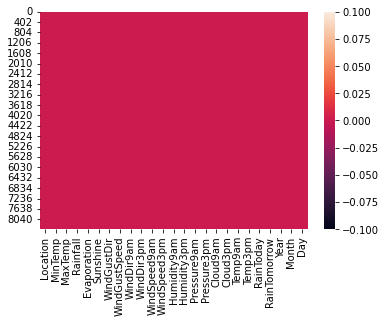

In [25]:
sns.heatmap(df1.isnull())

In [26]:
#Checking unique values of Categorical target column

df1['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [27]:
#Checking unique values of Continuous target column

df1['Rainfall'].value_counts()

0.0      5539
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

We have both <b>Regression</b> and <b>Classification</b> Problem.

# Summary Statistics

In [28]:
df1.describe().transpose()

count         mean        std     min          25%  \
MinTemp        8425.0    13.193305   5.379488    -2.0     9.300000   
MaxTemp        8425.0    23.859976   6.114516     8.2    19.300000   
Rainfall       8425.0     2.725982  10.319872     0.0     0.000000   
Evaporation    8425.0     5.060332   3.871619     0.0     4.000000   
Sunshine       8425.0     7.632205   2.825451     0.0     7.632205   
WindGustSpeed  8425.0    40.036320  13.781296     7.0    31.000000   
WindSpeed9am   8425.0    13.840000  10.128896     0.0     6.000000   
WindSpeed3pm   8425.0    18.533662   9.704759     0.0    11.000000   
Humidity9am    8425.0    67.822496  16.774231    10.0    56.000000   
Humidity3pm    8425.0    51.249790  18.311894     6.0    39.000000   
Pressure9am    8425.0  1017.640233   6.275759   989.8  1014.000000   
Pressure3pm    8425.0  1015.236075   6.217451   982.9  1011.400000   
Cloud9am       8425.0     4.566622   2.429205     0.0     3.000000   
Cloud3pm       8425.0     4.503183   2.299419     0.0     3.000000   
Temp9am        8425.0    17.762015   5.608301     1.9    13.800000   
Temp3pm        8425.0    22.442934   5.945849     7.3    18.100000   
Year           8425.0  2012.102433   2.473137  2008.0  2010.000000   
Month          8425.0     6.442136   3.437994     1.0     3.000000   
Day            8425.0    15.741958   8.787354     1.0     8.000000   

                       50%     75%     max  
MinTemp          13.200000    17.3    28.5  
MaxTemp          23.300000    28.0    45.5  
Rainfall          0.000000     0.8   371.0  
Evaporation       4.600000     5.2   145.0  
Sunshine          7.632205     8.9    13.9  
WindGustSpeed    39.000000    48.0   107.0  
WindSpeed9am     13.000000    20.0    63.0  
WindSpeed3pm     19.000000    24.0    83.0  
Humidity9am      68.000000    80.0   100.0  
Humidity3pm      51.000000    63.0    99.0  
Pressure9am    1017.640233  1021.3  1039.0  
Pressure3pm    1015.236075  1018.8  1036.0  
Cloud9am          4.566622     7.0     8.0  
Cloud3pm          4.503183     7.0     8.0  
Temp9am          17.762015    21.9    39.4  
Temp3pm          22.000000    26.3    44.1  
Year           2011.000000  2014.0  2017.0  
Month             6.000000     9.0    12.0  
Day              16.000000    23.0    31.0

<b>Observations:</b>

- We have count of 8425 in all features.
- We have mean and median of few of the columns very different from each other. Skewness is present.
- Rest all shows a clean data description.

## Visualization

## Univariate Analysis

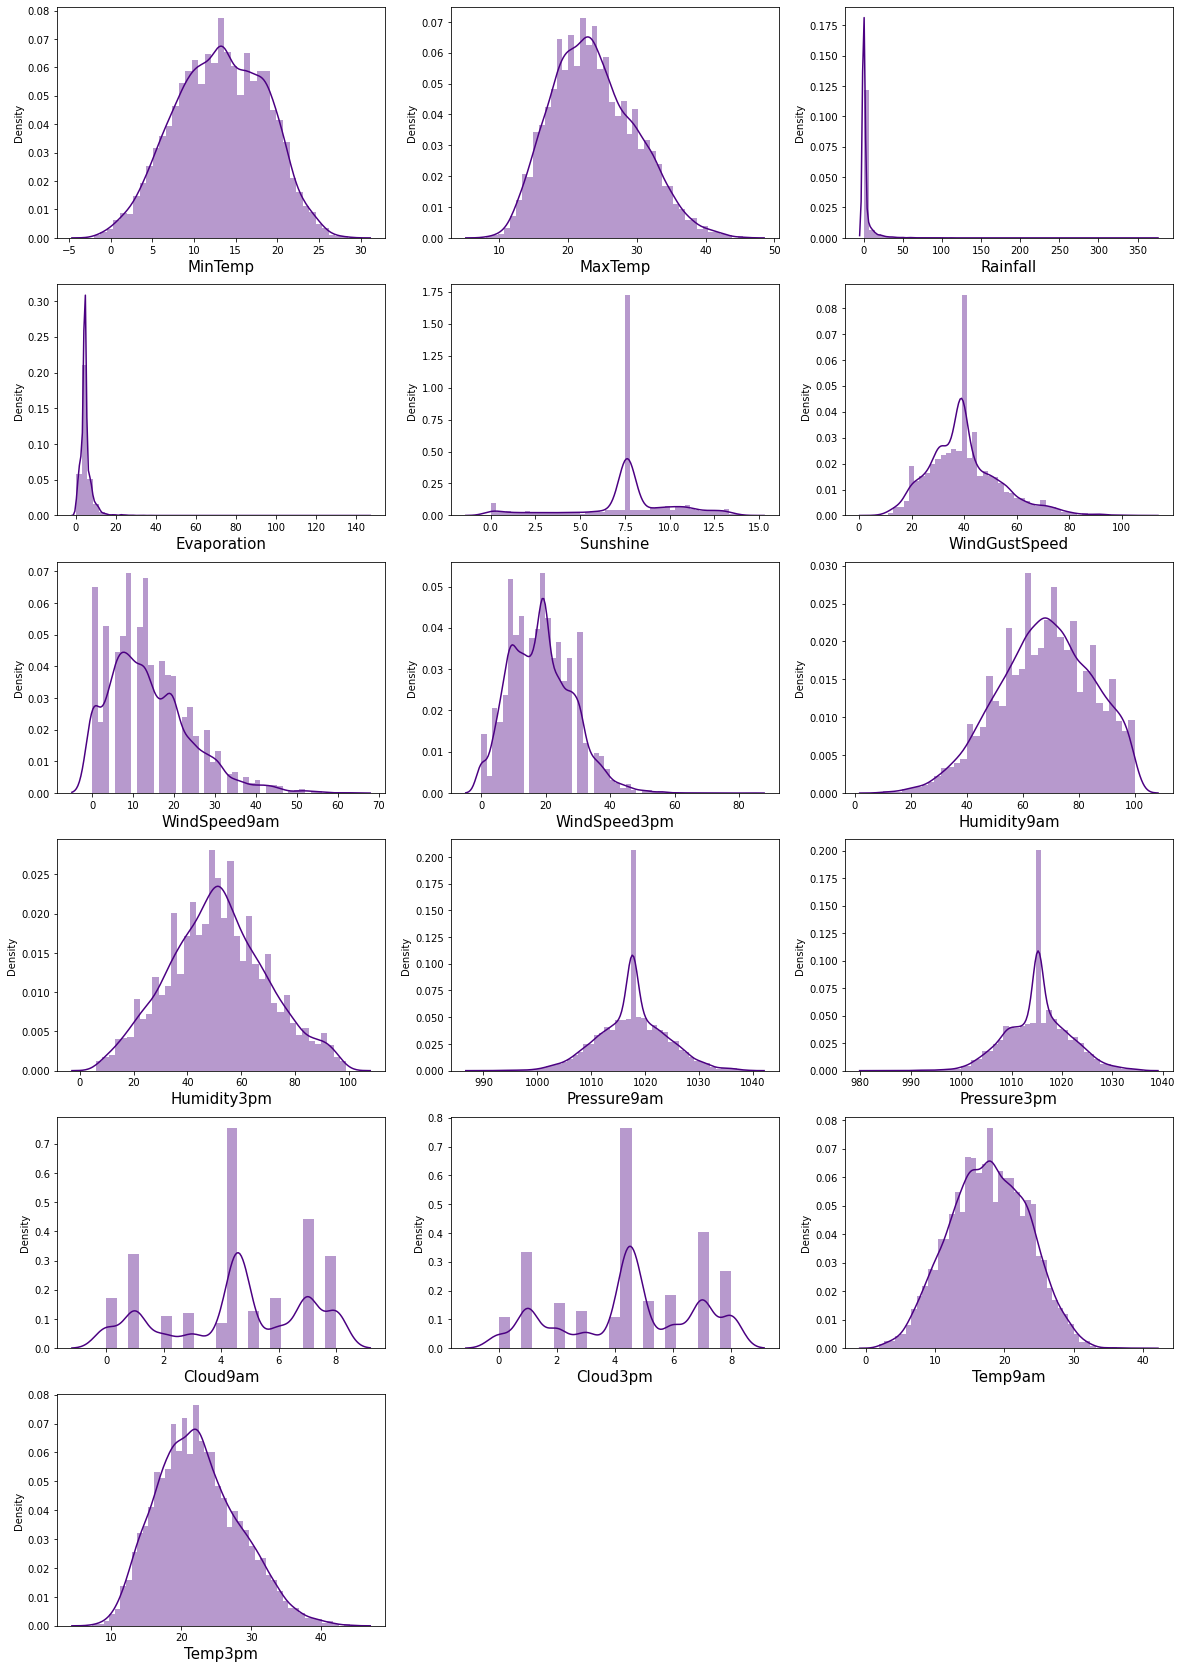

In [29]:
#The distribution of data for numerical columns?

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in df1[numerical_col]:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df1[i],color='indigo')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

Most of the columns are normally distributed except for Rainfall, Evaporation and Windspeed9am which are right skewed.

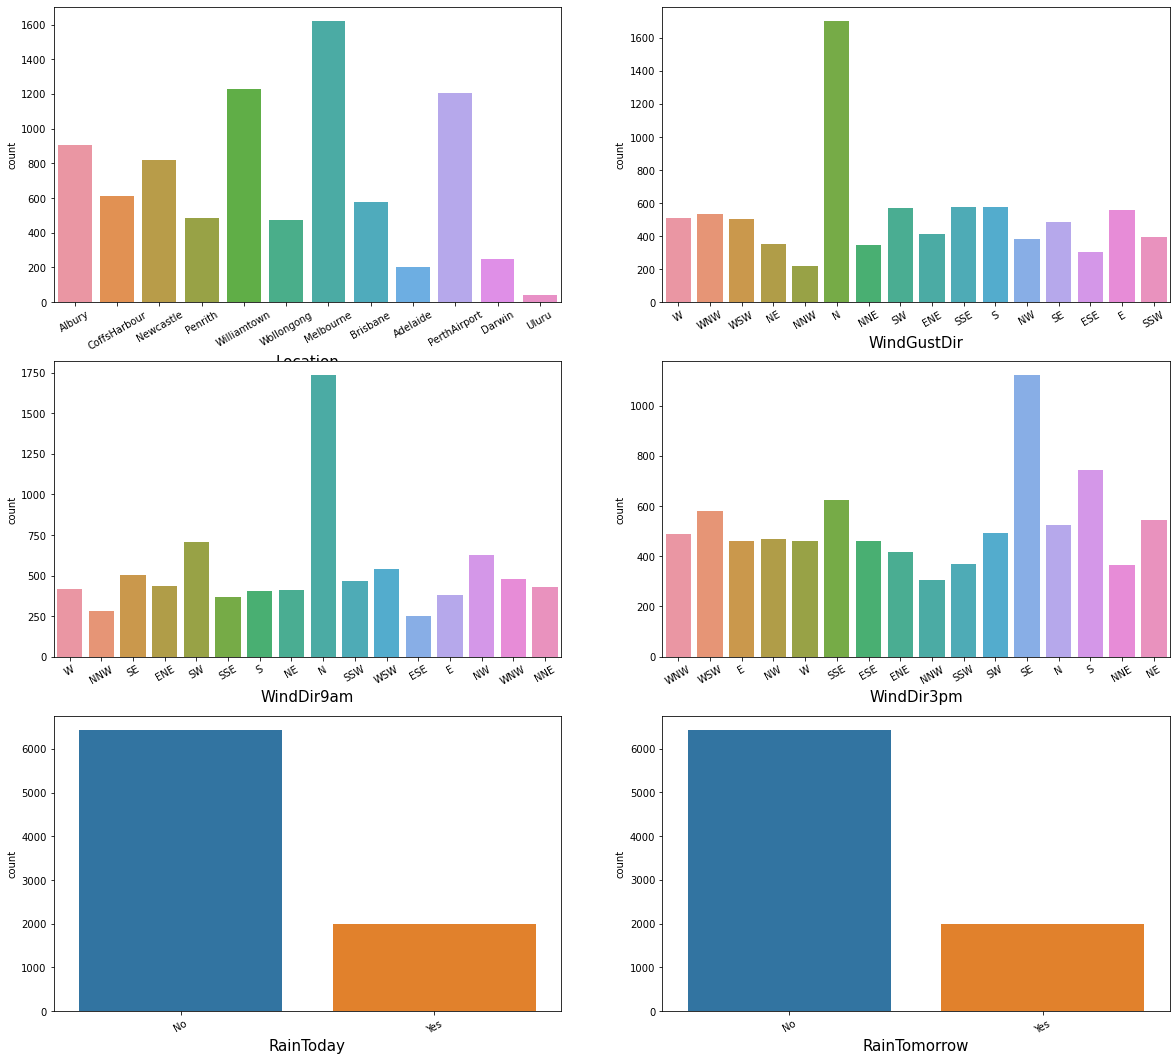

In [30]:
#the count of data for Categorical columns

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in df1[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df1[i])
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=30)
       
    plotnumber+=1
plt.show()

- Location Melbourne has the most data and Uluru has the least data in my dataset.
- The strongest wind direction or(Wind gust speed) in a day ranges variedly and most of the data says North.
- Morning Wind direction(9.00 am) also shows North as the most in the dataset.
- Evening wind direction (3.00 pm) shows South east as the most in the dataset.
- Most of the time there is NO rain today and No Rain predicted for tomorrow.

## Bivariate Analysis

In [31]:
#Lets plot a stacked plot of cat cols with target

def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (8,5))
    temp_df1 = (df1.groupby([group, target]).size()/df1.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df1.plot(kind='bar', stacked=True, ax = ax, color = ["blue", "red"])
    ax.xaxis.set_tick_params(rotation=30)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

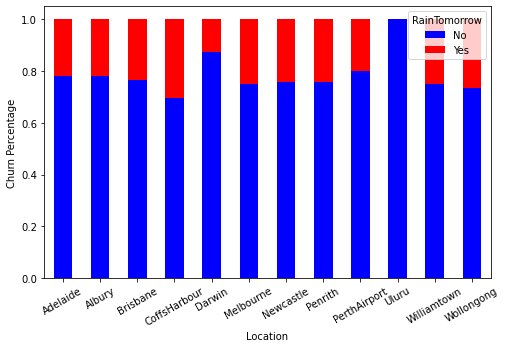

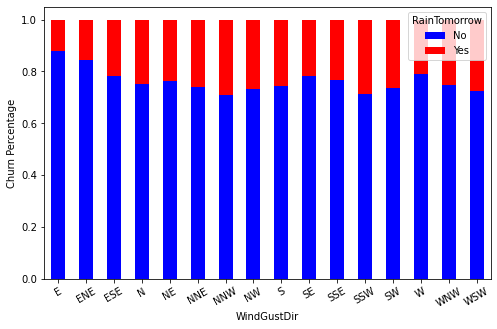

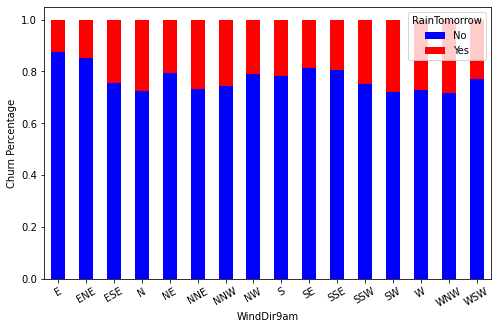

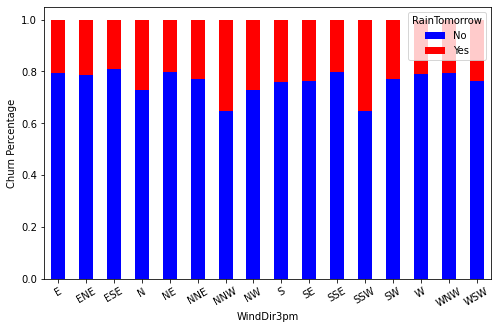

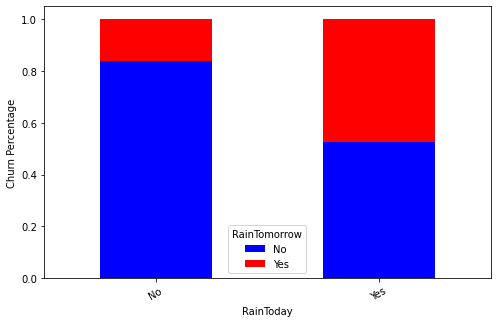

In [32]:
#lets check for gender, SeniorCitizen,Partner and Dependents

stacked_plot(df1, "Location", "RainTomorrow")
stacked_plot(df1, "WindGustDir", "RainTomorrow")
stacked_plot(df1, "WindDir9am", "RainTomorrow")
stacked_plot(df1, "WindDir3pm", "RainTomorrow")
stacked_plot(df1, "RainToday", "RainTomorrow")

<b>Observations:</b>

- The rate of Rainfall predicted for tomorrow is more for CoffsHarbour and zero for Uluru.
- The rainfal rate is the most when the WindGustdirection is NNW and SSW.
- The windDir9am doesnt have a specific pattern but WindDir3pm suggest that rainfall is predicted to happen when it NNW and SSW.
- We can see that Raintoday and Raintomorrow are correlated highly.

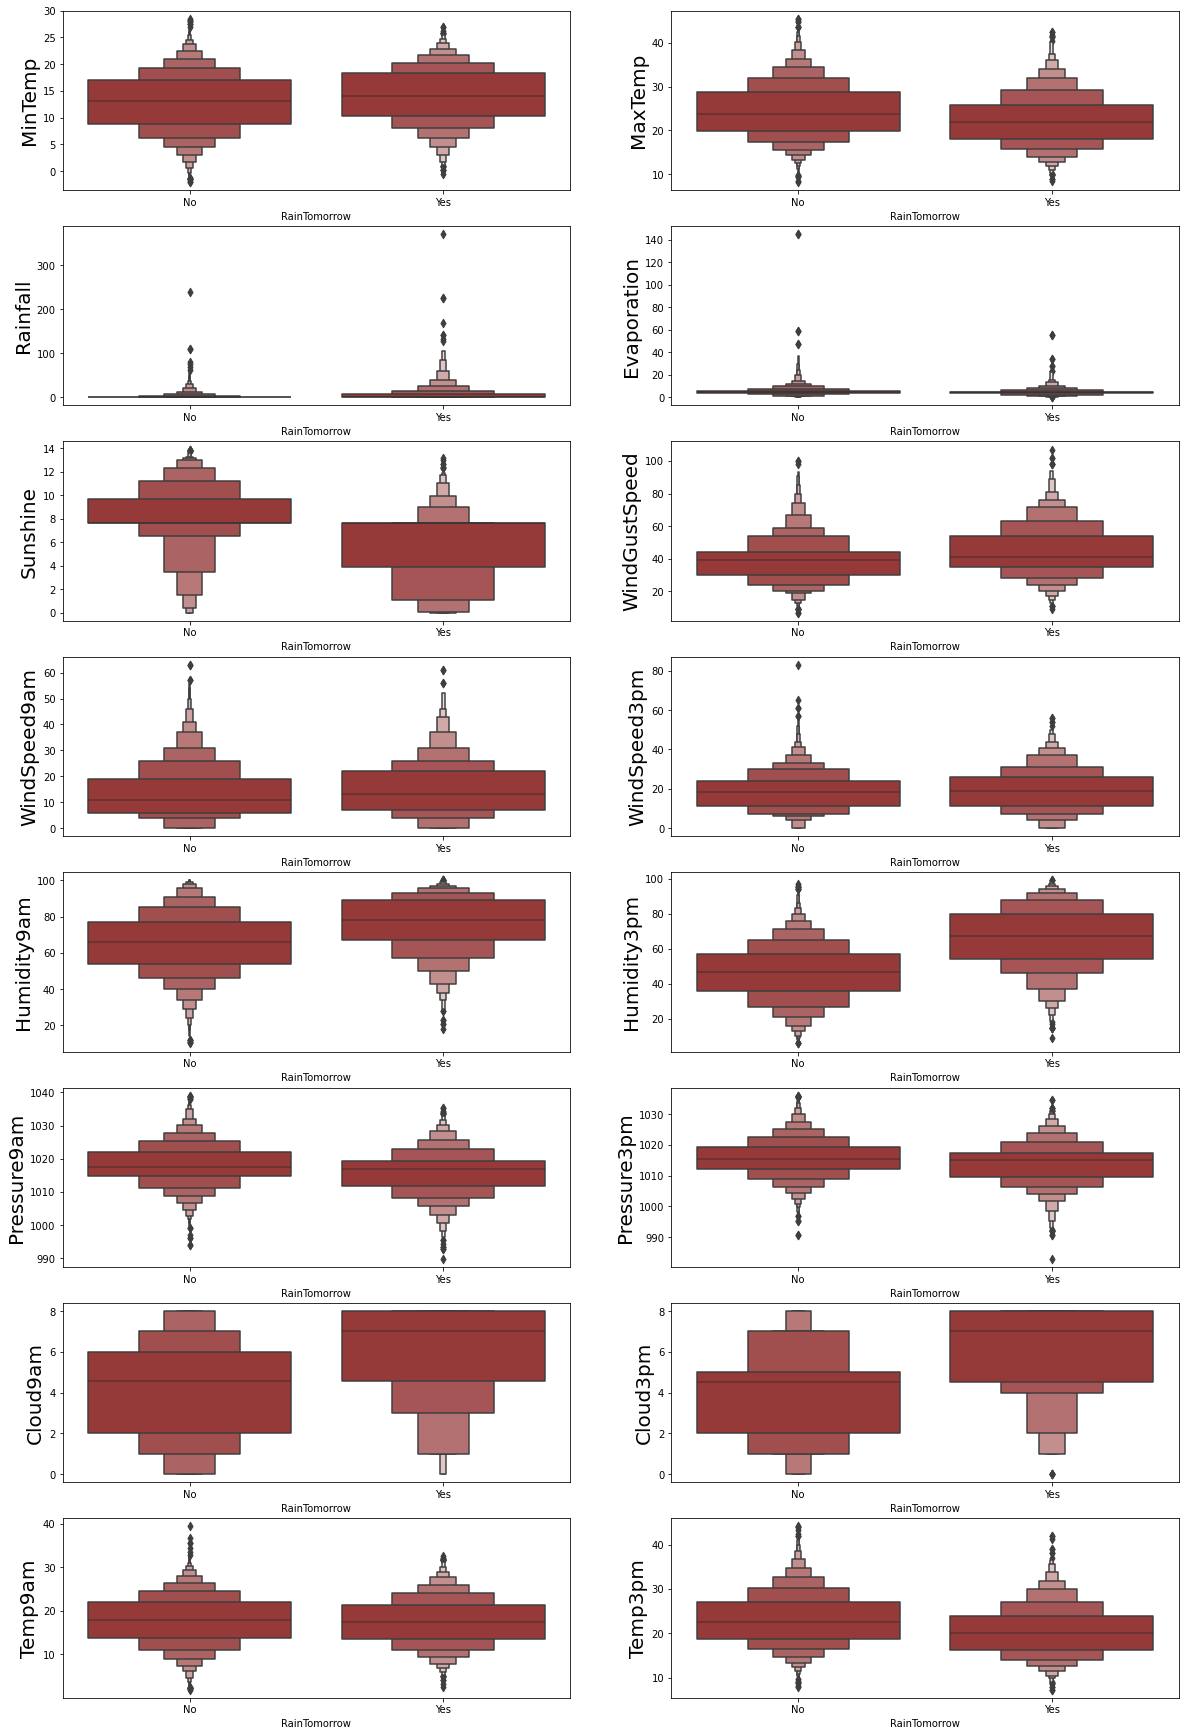

In [33]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for i in df1[numerical_col]:
    if plotnumber<=34 :
        ax = plt.subplot(9,2,plotnumber)
        sns.boxenplot(x=df1.RainTomorrow,y=df1[i],color='brown')
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

<b>Observations:</b>

- We can see more "No" than "Yes".
- When the MinTemp is between 12 to 17 and maxTemp between 17 to 27 chances of Rainfall on the next day is more.
- Morning Temp doesnt have any specific pattern but evening Temperature shows rainfall chance is more when temp is between 17 to 25 degree celsius
- Windspeed and pressure doesnt have a specific pattern.
- Rainfall and RainTomorrow have high correlation.
- Low Sunshine means More chance of RainTomorrow.
- WindGustspeed and RainTomorrow are positively correlated.
- When Humity is more chance of rainfall is higher.
- When cloud is more chance of rainfall is higher.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

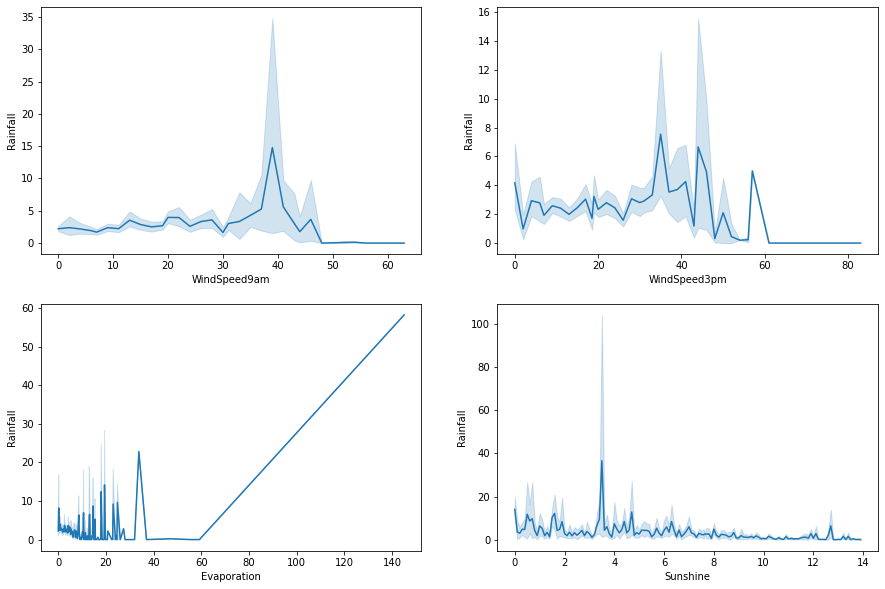

In [34]:
#lets check the plot between variables and one of our target Rainfall

fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[0,0],palette="OrRd",data=df1)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[0,1],palette="OrRd",data=df1)
#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df1)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df1)

- In the morning, at Windspeed between 30 to 40 km/h the rainfall is more.
- In the evening, at Windspeed and rainfall pattern varies.
- We can see that Evaporation and rainfall is correlated highly.
- Lesser sunshine more rainfall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

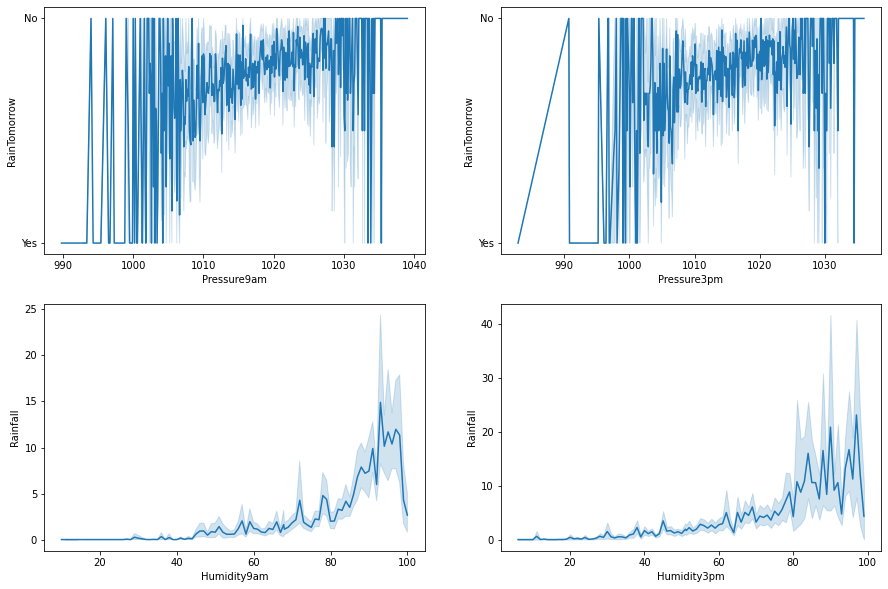

In [35]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df1)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df1)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df1)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df1)

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

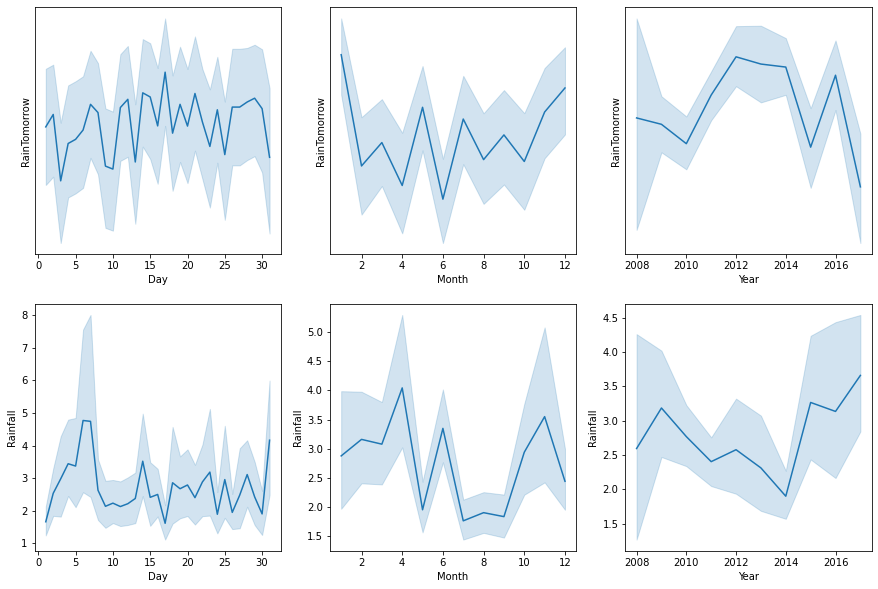

In [36]:
#lets check Day, month and Year with our targets.

fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0], data=df1)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1], data=df1)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2], data=df1)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0], data=df1)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1], data=df1)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2], data=df1)

- There is no specific pattern between Raintomorrow and day, month and year.
- Although April, June and November has the highest Rainfall.

# Multivariate Analysis

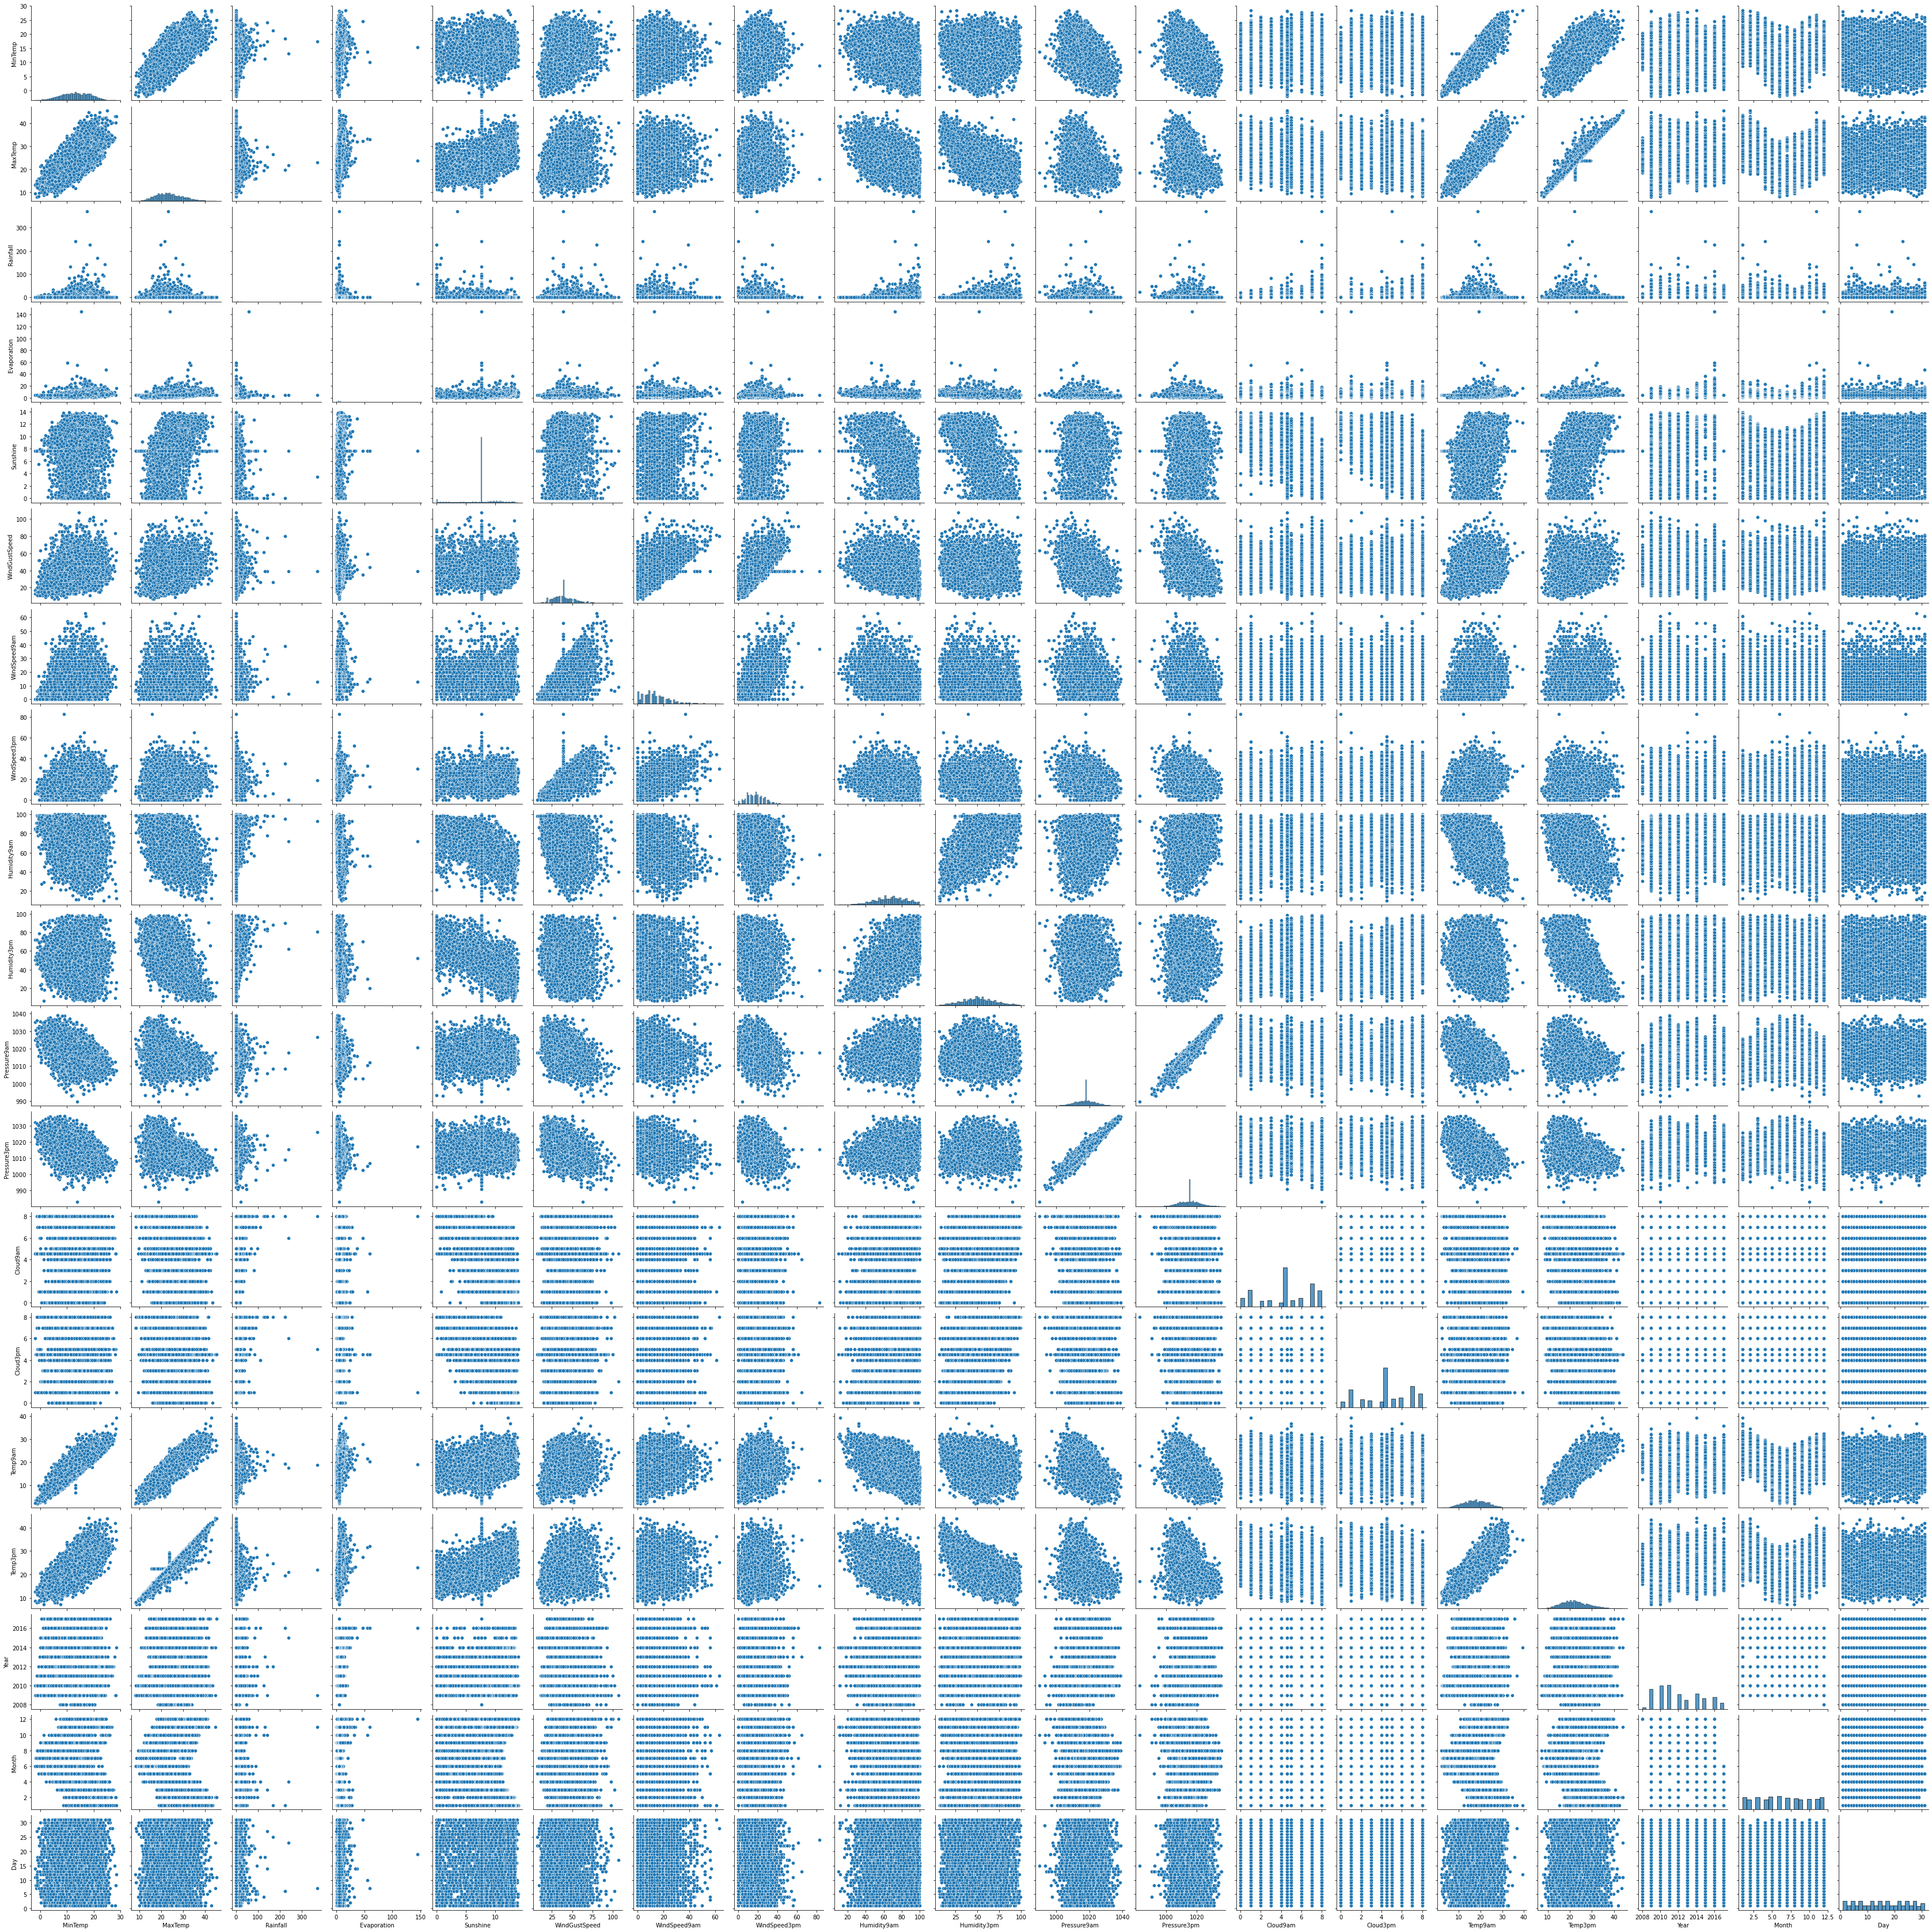

In [38]:
sns.pairplot(df1)

# Encoding

In [39]:
#Encoding the categorical columns:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [40]:
df1

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0          1.0     13.4  22.900000       0.6          4.6  7.632205   
1          1.0      7.4  25.100000       0.0          4.6  7.632205   
2          1.0     12.9  25.700000       0.0          4.6  7.632205   
3          1.0      9.2  28.000000       0.0          4.6  7.632205   
4          1.0     17.5  32.300000       1.0          4.6  7.632205   
...        ...      ...        ...       ...          ...       ...   
8420       9.0      2.8  23.400000       0.0          4.6  7.632205   
8421       9.0      3.6  25.300000       0.0          4.6  7.632205   
8422       9.0      5.4  26.900000       0.0          4.6  7.632205   
8423       9.0      7.8  27.000000       0.0          4.6  7.632205   
8424       9.0     14.9  23.859976       0.0          4.6  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0            13.0           44.0        13.0        14.0  ...       1007.1   
1            14.0           44.0         6.0        15.0  ...       1007.8   
2            15.0           46.0        13.0        15.0  ...       1008.7   
3             4.0           24.0         9.0         0.0  ...       1012.8   
4            13.0           41.0         1.0         7.0  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420          0.0           31.0         9.0         1.0  ...       1020.3   
8421          6.0           22.0         9.0         3.0  ...       1019.1   
8422          3.0           37.0         9.0        14.0  ...       1016.8   
8423          9.0           28.0        10.0         3.0  ...       1016.5   
8424          3.0           39.0         2.0         2.0  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0     8.000000  4.503183     16.9     21.8        0.0           0.0  2008   
1     4.566622  4.503183     17.2     24.3        0.0           0.0  2008   
2     4.566622  2.000000     21.0     23.2        0.0           0.0  2008   
3     4.566622  4.503183     18.1     26.5        0.0           0.0  2008   
4     7.000000  8.000000     17.8     29.7        0.0           0.0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8420  4.566622  4.503183     10.1     22.4        0.0           0.0  2017   
8421  4.566622  4.503183     10.9     24.5        0.0           0.0  2017   
8422  4.566622  4.503183     12.5     26.1        0.0           0.0  2017   
8423  3.000000  2.000000     15.1     26.0        0.0           0.0  2017   
8424  8.000000  8.000000     15.0     20.9        0.0           0.0  2017   

      Month  Day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[8425 rows x 25 columns]

In [41]:
df1.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Year               int64
Month              int64
Day                int64
dtype: object

In [42]:
df1.shape

(8425, 25)

# Correlation

In [48]:
df1.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.005801     0.130778  0.057817   
MinTemp        0.116531  1.000000  0.717522  0.085723     0.262908  0.056184   
MaxTemp        0.064268  0.717522  1.000000 -0.087710     0.326647  0.378403   
Rainfall       0.005801  0.085723 -0.087710  1.000000     0.020252 -0.167120   
Evaporation    0.130778  0.262908  0.326647  0.020252     1.000000  0.226006   
Sunshine       0.057817  0.056184  0.378403 -0.167120     0.226006  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.037106    -0.073549 -0.105918   
WindGustSpeed  0.230018  0.230214  0.139864  0.082628     0.147367 -0.013973   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093072    -0.055144 -0.076560   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038153    -0.048325 -0.068553   
WindSpeed9am   0.221035  0.136693  0.013082  0.048726     0.133320 -0.018087   
WindSpeed3pm   0.231801  0.178349  0.088172  0.021654     0.121626  0.030145   
Humidity9am    0.005662 -0.130731 -0.390976  0.227595    -0.235142 -0.360831   
Humidity3pm    0.055790  0.079048 -0.421879  0.234938    -0.169850 -0.440268   
Pressure9am   -0.032261 -0.429432 -0.325721 -0.069604    -0.177526  0.021887   
Pressure3pm   -0.020574 -0.422991 -0.403258 -0.031268    -0.189523 -0.035863   
Cloud9am       0.038019  0.091604 -0.253968  0.183811    -0.076336 -0.533391   
Cloud3pm       0.017561  0.038414 -0.250132  0.150187    -0.117516 -0.547304   
Temp9am        0.118051  0.887119  0.866039 -0.007351     0.316495  0.250640   
Temp3pm        0.060570  0.685520  0.974506 -0.090768     0.318108  0.395324   
RainToday      0.003071  0.064789 -0.224883  0.464941    -0.090225 -0.234230   
RainTomorrow   0.002824  0.092942 -0.152886  0.219015    -0.060025 -0.327731   
Year           0.486405  0.044123  0.119772  0.004491     0.128610  0.065374   
Month         -0.082407 -0.245854 -0.163253 -0.016258     0.012519 -0.006694   
Day           -0.002019  0.009446  0.015608 -0.013029     0.015478  0.004662   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.035408       0.230018   -0.027103   -0.027736  ...   
MinTemp          -0.145316       0.230214   -0.041650   -0.147166  ...   
MaxTemp          -0.224670       0.139864   -0.214119   -0.180622  ...   
Rainfall          0.037106       0.082628    0.093072    0.038153  ...   
Evaporation      -0.073549       0.147367   -0.055144   -0.048325  ...   
Sunshine         -0.105918      -0.013973   -0.076560   -0.068553  ...   
WindGustDir       1.000000       0.025577    0.403562    0.505799  ...   
WindGustSpeed     0.025577       1.000000   -0.068545    0.070677  ...   
WindDir9am        0.403562      -0.068545    1.000000    0.249527  ...   
WindDir3pm        0.505799       0.070677    0.249527    1.000000  ...   
WindSpeed9am      0.025910       0.606090    0.054972    0.025956  ...   
WindSpeed3pm      0.094623       0.639097    0.047116    0.068799  ...   
Humidity9am       0.036467      -0.271861    0.025604   -0.010312  ...   
Humidity3pm       0.053567      -0.093639    0.124556   -0.012167  ...   
Pressure9am      -0.109704      -0.406731   -0.011024   -0.136517  ...   
Pressure3pm      -0.024997      -0.372113    0.073446   -0.043681  ...   
Cloud9am          0.123883       0.025104    0.099582    0.075453  ...   
Cloud3pm          0.092979       0.079348    0.062947    0.053986  ...   
Temp9am          -0.176318       0.202277   -0.103111   -0.165072  ...   
Temp3pm          -0.238856       0.102006   -0.221634   -0.194463  ...   
RainToday         0.125188       0.076890    0.157324    0.100125  ...   
RainTomorrow      0.051832       0.190274    0.032860    0.008918  ...   
Year             -0.088340      -0.049612   -0.014498   -0.005812  ...   
Month             0.034823       0.051063    0.012544    0.029384  ...   
Day               0.015683      -0.002454   -0.015154    0.003089  ...   

         

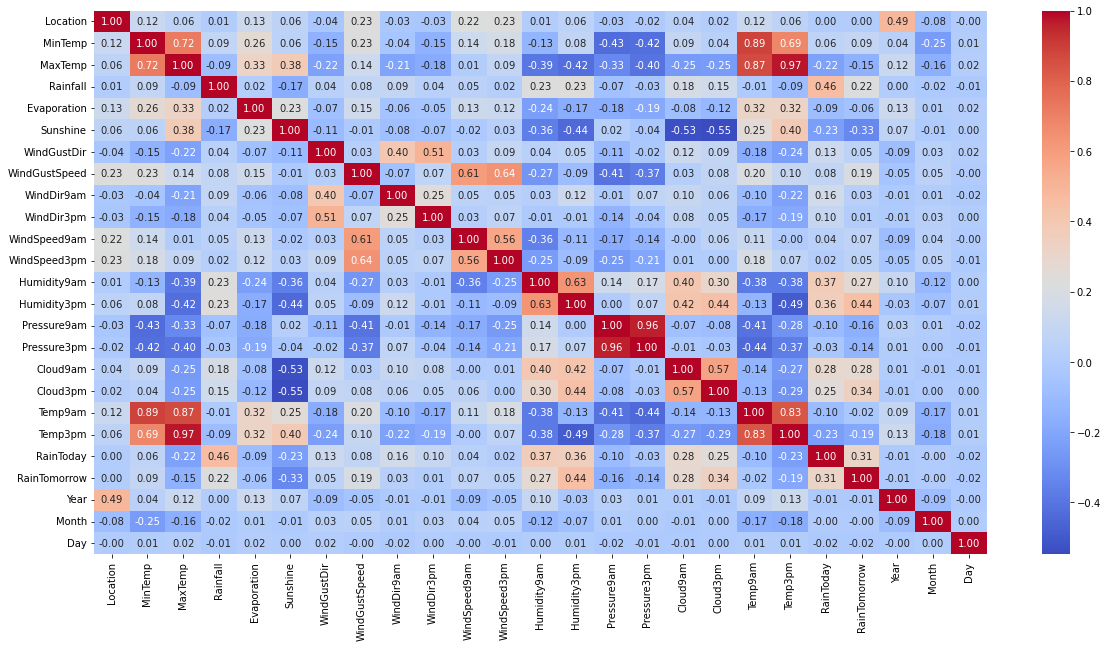

In [50]:
#Correlation Heat map
corr=df1.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

We have multicollinearity. Our target Rainfall is highly correlated with RainToday and followed by Humidity 9am and Humidity 3pm. Least correlation is between rainfall and year,month,windspeen3pm,windspeed 9am,location.

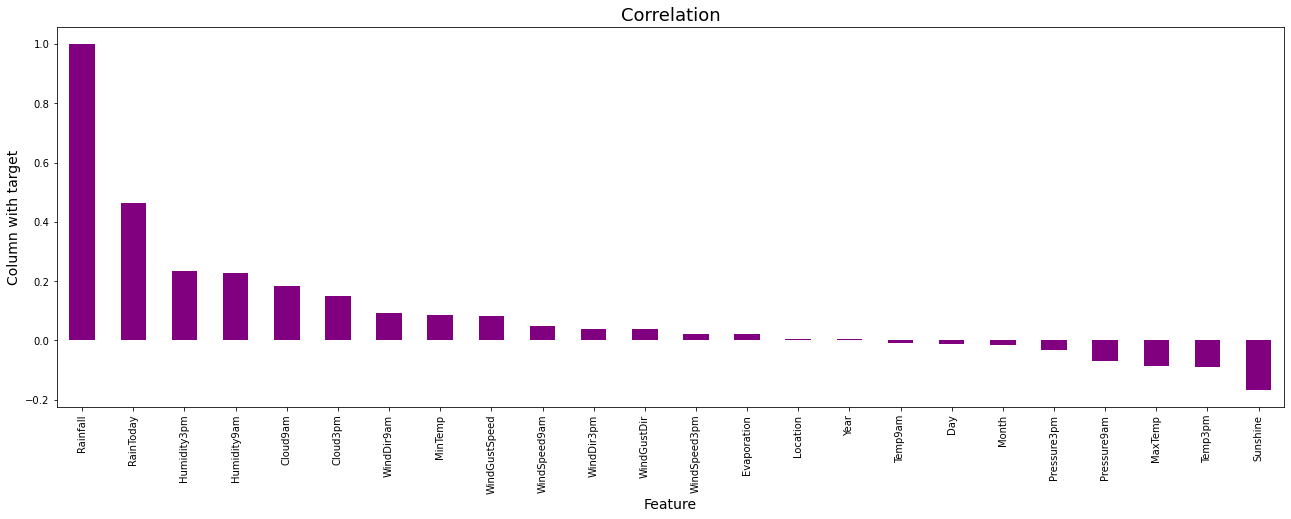

In [53]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df1.corr()['Rainfall'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

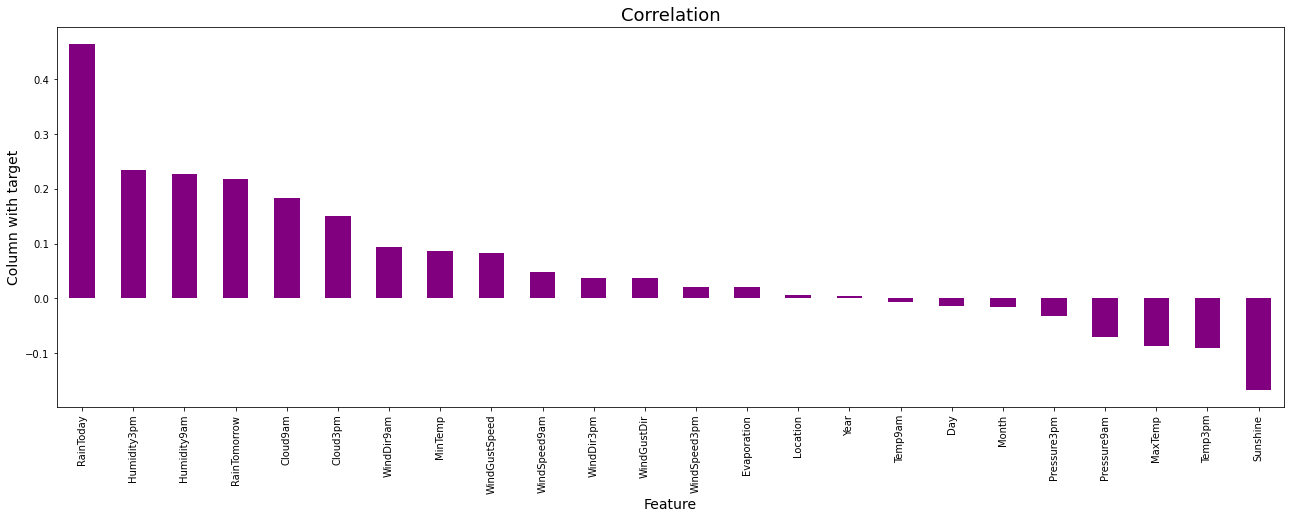

In [52]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df1.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

# Skewness

In [51]:
df1.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.200523
Evaporation      14.064000
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.962761
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Year              0.418663
Month             0.039388
Day               0.004260
dtype: float64

In [54]:
#Using Power transformer to remove skewness

skew_cols=["Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df1[skew_cols] = scaler.fit_transform(df1[skew_cols].values)

In [55]:
df1.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.028215
Evaporation      0.012404
Sunshine        -0.075544
WindGustDir      0.119640
WindGustSpeed    0.010481
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -0.078875
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
Year             0.418663
Month            0.039388
Day              0.004260
dtype: float64

# Outliers Check

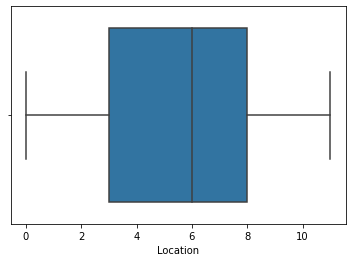

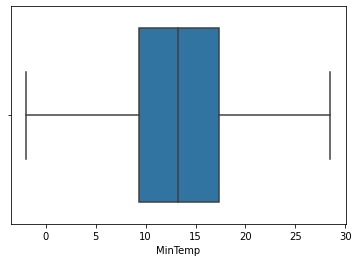

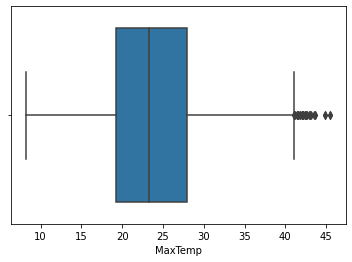

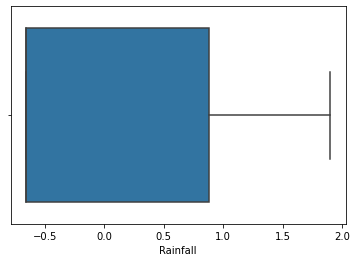

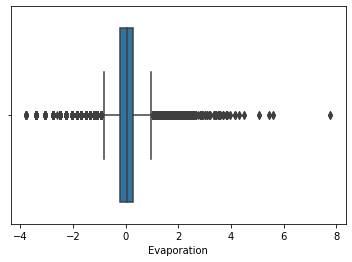

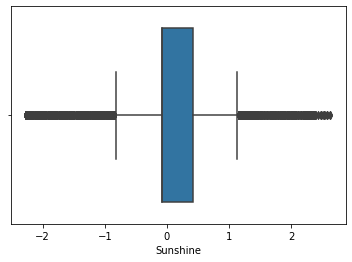

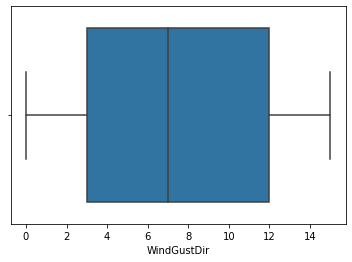

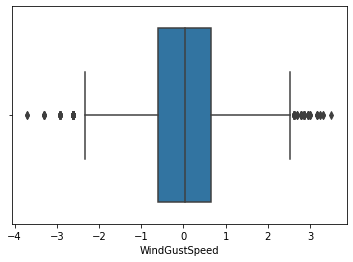

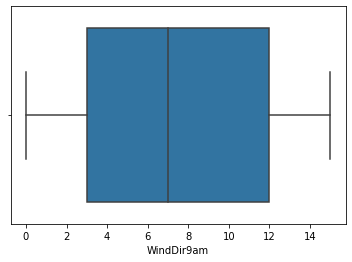

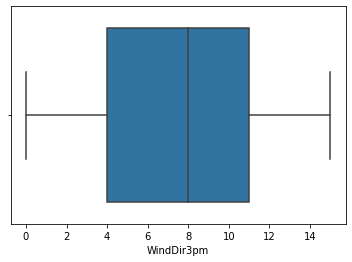

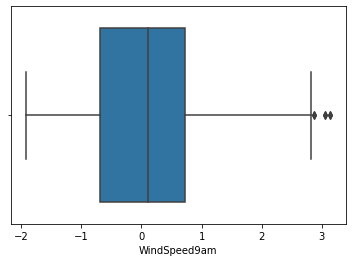

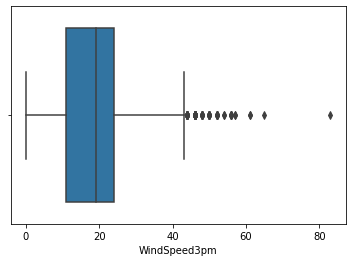

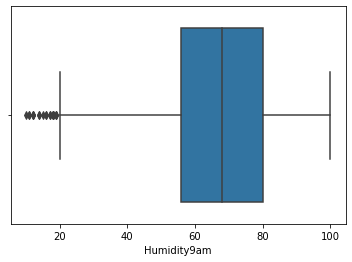

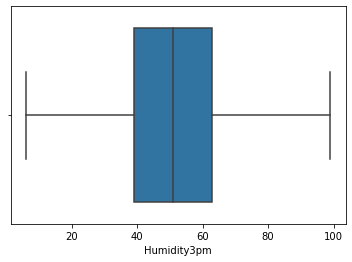

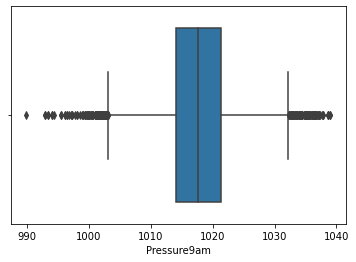

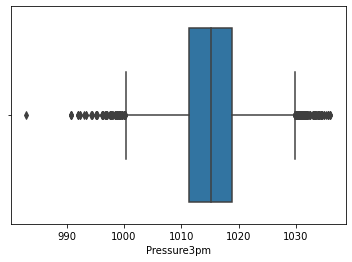

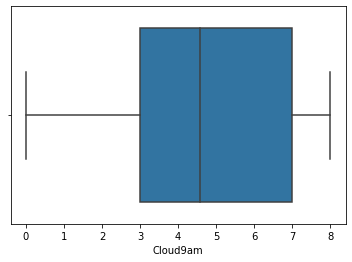

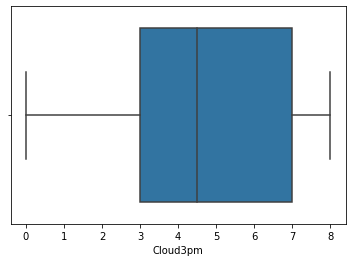

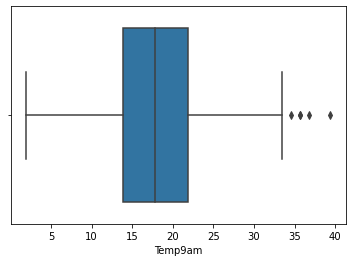

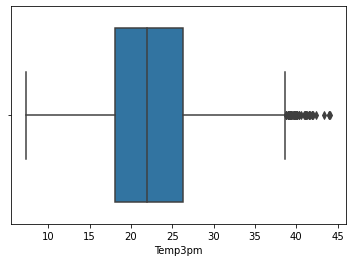

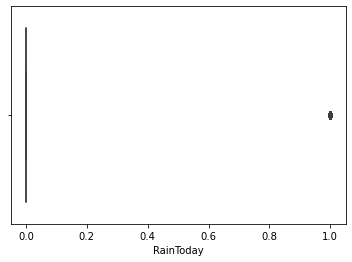

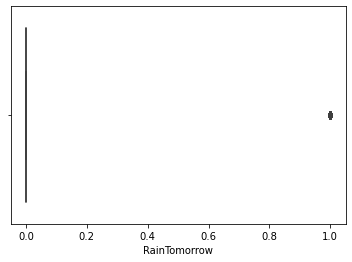

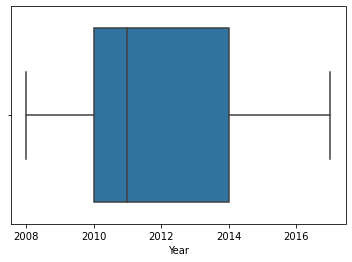

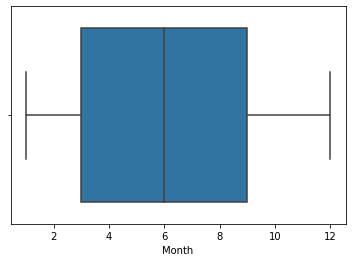

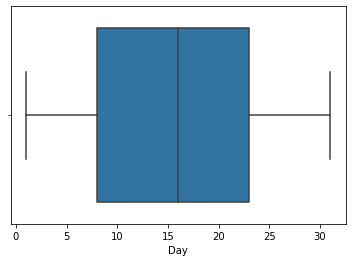

In [63]:
for i in df1:
    plt.figure()
    sns.boxplot(x=df1[i])

# Removing Outliers

In [64]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df1))
print(np.where(dfzscore>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
        407,  568,  568,  569,  602,  683,  683,  748,  748, 1008, 1189,
       1369, 1387, 1413, 1426, 1467, 1480, 1587, 1644, 1665, 1898, 2028,
       2043, 2219, 2230, 2346, 2373, 2389, 2527, 2527, 2710, 2738, 2743,
       2744, 2768, 2835, 2838, 2849, 2855, 2859, 2863, 2869, 2877, 2883,
       2891, 2897, 2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967,
       2975, 2989, 3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099,
       3101, 3139, 3141, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3206,
       3212, 3212, 3213, 3221, 3227, 3248, 3260, 3271, 3278, 3278, 3291,
       3291, 3302, 3302, 3303, 3449, 3449, 3450, 3458, 3471, 3617, 3687,
       3690, 3701, 3707, 3711, 3715, 3721, 3729, 3735, 3743, 3749, 3757,
       3763, 3771, 3785, 3791, 3799, 3805, 3813, 3819, 3827, 3841, 3903,
       3910, 3911, 3911, 3912, 3919, 3934, 3950, 3

In [65]:
dfnew=df1[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df1=dfnew

dfnew.shape= (8121, 25)


In [66]:
# Data Loss

dataloss=(8425-8121)/8425*100
dataloss

3.608308605341246

Data loss is 3.6.

# Splitting the data into two parts: Input and Target Variable

In [71]:
X = df1.drop("Rainfall", axis=1)
X

Location  MinTemp    MaxTemp  Evaporation  Sunshine  WindGustDir  \
0          1.0     13.4  22.900000     0.048093 -0.082709         13.0   
1          1.0      7.4  25.100000     0.048093 -0.082709         14.0   
2          1.0     12.9  25.700000     0.048093 -0.082709         15.0   
3          1.0      9.2  28.000000     0.048093 -0.082709          4.0   
4          1.0     17.5  32.300000     0.048093 -0.082709         13.0   
...        ...      ...        ...          ...       ...          ...   
8420       9.0      2.8  23.400000     0.048093 -0.082709          0.0   
8421       9.0      3.6  25.300000     0.048093 -0.082709          6.0   
8422       9.0      5.4  26.900000     0.048093 -0.082709          3.0   
8423       9.0      7.8  27.000000     0.048093 -0.082709          9.0   
8424       9.0     14.9  23.859976     0.048093 -0.082709          3.0   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.394268        13.0        14.0      0.718789  ...       1007.1   
1          0.394268         6.0        15.0     -0.990156  ...       1007.8   
2          0.529217        13.0        15.0      0.639451  ...       1008.7   
3         -1.258863         9.0         0.0     -0.089100  ...       1012.8   
4          0.183934         1.0         7.0     -0.553319  ...       1006.0   
...             ...         ...         ...           ...  ...          ...   
8420      -0.601802         9.0         1.0      0.112350  ...       1020.3   
8421      -1.469455         9.0         3.0      0.112350  ...       1019.1   
8422      -0.113140         9.0        14.0     -0.308990  ...       1016.8   
8423      -0.869984        10.0         3.0      0.112350  ...       1016.5   
8424       0.037937         2.0         2.0      0.474300  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0     8.000000  4.503183     16.9     21.8        0.0           0.0  2008   
1     4.566622  4.503183     17.2     24.3        0.0           0.0  2008   
2     4.566622  2.000000     21.0     23.2        0.0           0.0  2008   
3     4.566622  4.503183     18.1     26.5        0.0           0.0  2008   
4     7.000000  8.000000     17.8     29.7        0.0           0.0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8420  4.566622  4.503183     10.1     22.4        0.0           0.0  2017   
8421  4.566622  4.503183     10.9     24.5        0.0           0.0  2017   
8422  4.566622  4.503183     12.5     26.1        0.0           0.0  2017   
8423  3.000000  2.000000     15.1     26.0        0.0           0.0  2017   
8424  8.000000  8.000000     15.0     20.9        0.0           0.0  2017   

      Month  Day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[8121 rows x 24 columns]

In [72]:
x.shape

(8121, 24)

In [85]:
Y=df1['Rainfall']
Y

0       0.677035
1      -0.659667
2      -0.659667
3      -0.659667
4       1.038925
          ...   
8420   -0.659667
8421   -0.659667
8422   -0.659667
8423   -0.659667
8424   -0.659667
Name: Rainfall, Length: 8121, dtype: float64

# Checking VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

VIF values       Features
0        5.051197       Location
1       59.954429        MinTemp
2      431.008154        MaxTemp
3        1.540436    Evaporation
4        2.052211       Sunshine
5        5.322273    WindGustDir
6        2.405072  WindGustSpeed
7        4.769710     WindDir9am
8        6.120818     WindDir3pm
9        1.990340   WindSpeed9am
10       9.683572   WindSpeed3pm
11      69.713121    Humidity9am
12      51.023344    Humidity3pm
13  562950.234756    Pressure9am
14  546030.133046    Pressure3pm
15       8.850090       Cloud9am
16       8.920986       Cloud3pm
17     193.642912        Temp9am
18     512.894828        Temp3pm
19       1.819216      RainToday
20       1.900333   RainTomorrow
21   43619.422662           Year
22       5.169864          Month
23       4.208629            Day

In [76]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

VIF values       Features
0       5.049905       Location
1      58.950401        MinTemp
2     430.807930        MaxTemp
3       1.525800    Evaporation
4       2.043725       Sunshine
5       5.284063    WindGustDir
6       2.384352  WindGustSpeed
7       4.695861     WindDir9am
8       5.845601     WindDir3pm
9       1.986233   WindSpeed9am
10      9.645495   WindSpeed3pm
11     69.342816    Humidity9am
12     50.386744    Humidity3pm
13  40920.342134    Pressure3pm
14      8.849313       Cloud9am
15      8.917270       Cloud3pm
16    191.470221        Temp9am
17    496.733690        Temp3pm
18      1.801491      RainToday
19      1.895616   RainTomorrow
20  42068.467777           Year
21      5.160416          Month
22      4.205512            Day

# Scaling

In [78]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0    -1.510278  0.040018 -0.156383     0.059788 -0.091645     1.232208   
1    -1.510278 -1.078689  0.211298     0.059788 -0.091645     1.444765   
2    -1.510278 -0.053208  0.311574     0.059788 -0.091645     1.657323   
3    -1.510278 -0.743077  0.695968     0.059788 -0.091645    -0.680806   
4    -1.510278  0.804467  1.414616     0.059788 -0.091645     1.232208   
...        ...       ...       ...          ...       ...          ...   
8116  1.026165 -1.936364 -0.072819     0.059788 -0.091645    -1.531034   
8117  1.026165 -1.787204  0.244723     0.059788 -0.091645    -0.255691   
8118  1.026165 -1.451591  0.512127     0.059788 -0.091645    -0.893363   
8119  1.026165 -1.004109  0.528840     0.059788 -0.091645     0.381980   
8120  1.026165  0.319694  0.004056     0.059788 -0.091645    -0.893363   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.420358    1.248715    1.398454      0.739525  ...    -1.381540   
1          0.420358   -0.277269    1.624452     -0.978398  ...    -1.263483   
2          0.558419    1.248715    1.624452      0.659770  ...    -1.111696   
3         -1.270906    0.376725   -1.765517     -0.072608  ...    -0.420223   
4          0.205171   -1.367257   -0.183531     -0.539266  ...    -1.567057   
...             ...         ...         ...           ...  ...          ...   
8116      -0.598689    0.376725   -1.539519      0.129901  ...     0.844668   
8117      -1.486356    0.376725   -1.087523      0.129901  ...     0.642286   
8118      -0.098755    0.376725    1.398454     -0.293654  ...     0.254386   
8119      -0.873056    0.594722   -1.087523      0.129901  ...     0.203790   
8120       0.055807   -1.149259   -1.313521      0.493752  ...     0.439903   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0     1.412030  0.002054 -0.154676 -0.106833  -0.553595     -0.554354   
1     0.000513  0.002054 -0.100454  0.322496  -0.553595     -0.554354   
2     0.000513 -1.086515  0.586360  0.133591  -0.553595     -0.554354   
3     0.000513  0.002054  0.062213  0.700305  -0.553595     -0.554354   
4     1.000914  1.522730  0.007990  1.249846  -0.553595     -0.554354   
...        ...       ...       ...       ...        ...           ...   
8116  0.000513  0.002054 -1.383710 -0.003794  -0.553595     -0.554354   
8117  0.000513  0.002054 -1.239118  0.356842  -0.553595     -0.554354   
8118  0.000513  0.002054 -0.949933  0.631613  -0.553595     -0.554354   
8119 -0.643550 -1.086515 -0.480009  0.614440  -0.553595     -0.554354   
8120  1.412030  1.522730 -0.498083 -0.261392  -0.553595     -0.554354   

          Year     Month       Day  
0    -1.657662  1.624159 -1.672220  
1    -1.657662  1.624159 -1.558539  
2    -1.657662  1.624159 -1.444858  
3    -1.657662  1.624159 -1.331177  
4    -1.657662  1.624159 -1.217496  
...        ...       ...       ...  
8116  1.998800 -0.122178  0.601399  
8117  1.998800 -0.122178  0.715080  
8118  1.998800 -0.122178  0.828761  
8119  1.998800 -0.122178  0.942442  
8120  1.998800 -0.122178  1.056123  

[8121 rows x 23 columns]

In [79]:
# Checking VIF after scaling the data.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

VIF values       Features
0     1.590100       Location
1     8.545080        MinTemp
2    25.546988        MaxTemp
3     1.538292    Evaporation
4     2.049689       Sunshine
5     1.599382    WindGustDir
6     2.393496  WindGustSpeed
7     1.347934     WindDir9am
8     1.423985     WindDir3pm
9     2.001452   WindSpeed9am
10    2.009787   WindSpeed3pm
11    3.998943    Humidity9am
12    5.684205    Humidity3pm
13    1.438620    Pressure3pm
14    1.956649       Cloud9am
15    1.848504       Cloud3pm
16   17.137072        Temp9am
17   31.387402        Temp3pm
18    1.379057      RainToday
19    1.451503   RainTomorrow
20    1.524719           Year
21    1.152755          Month
22    1.003842            Day

In [80]:
# Dropping Temp3pm, Temp9am column
X.drop("Temp3pm",axis=1,inplace=True)
X.drop("Temp9am",axis=1,inplace=True)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

VIF values       Features
0     1.587490       Location
1     4.492531        MinTemp
2     5.386820        MaxTemp
3     1.533876    Evaporation
4     2.042439       Sunshine
5     1.591053    WindGustDir
6     2.336195  WindGustSpeed
7     1.345364     WindDir9am
8     1.416937     WindDir3pm
9     1.984857   WindSpeed9am
10    1.960965   WindSpeed3pm
11    2.523654    Humidity9am
12    3.150464    Humidity3pm
13    1.434261    Pressure3pm
14    1.934302       Cloud9am
15    1.834769       Cloud3pm
16    1.374704      RainToday
17    1.450906   RainTomorrow
18    1.500698           Year
19    1.125495          Month
20    1.003515            Day

Multicolinearity is removed from our data.

# Regression

# Finding the best random state

In [89]:
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9100682307275401  on Random_state  47


# Creating train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)

In [90]:
X_train.shape

(5684, 21)

In [91]:
X_test.shape

(2437, 21)

In [92]:
Y_train.shape

(5684,)

In [93]:
Y_test.shape

(2437,)

# Linear Regression

In [94]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print('R2_score:',r2_score(Y_test,predLR))
print('MAE:',metrics.mean_absolute_error(Y_test, predLR))
print('MSE:',metrics.mean_squared_error(Y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predLR)))

R2_score: 0.8948957025413782
MAE: 0.20889729623170858
MSE: 0.10814372050715897
RMSE: 0.3288521255931896


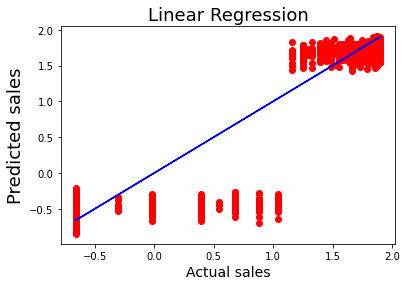

In [95]:
plt.scatter(x=Y_test, y=predLR, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# DecisionTree Regressor

In [96]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
preddtr=DTR.predict(X_test)
print('R2_score:',r2_score(Y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(Y_test, preddtr))
print('MSE:',metrics.mean_squared_error(Y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddtr)))

R2_score: 0.8681043691926458
MAE: 0.151577628270449
MSE: 0.13570980996054288
RMSE: 0.36838812407641874


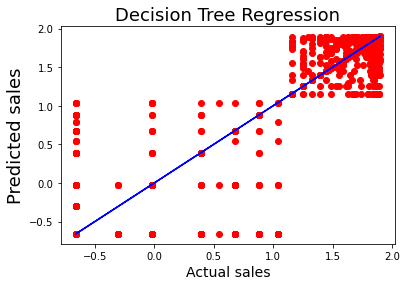

In [97]:
plt.scatter(x=Y_test, y=preddtr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Decision Tree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# KNeighbors Regressor

In [98]:
KNR=KNeighborsRegressor()
KNR.fit(X_train,Y_train)
predknr=KNR.predict(X_test)
print('R2_score:',r2_score(Y_test,predknr))
print('MAE:',metrics.mean_absolute_error(Y_test, predknr))
print('MSE:',metrics.mean_squared_error(Y_test, predknr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predknr)))

R2_score: 0.8453434121927389
MAE: 0.22035411708726413
MSE: 0.15912897199092935
RMSE: 0.39890972912543676


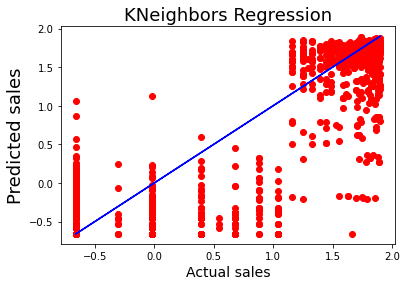

In [99]:
plt.scatter(x=Y_test, y=predknr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# Support Vector Regressor

In [100]:
svr=SVR()
svr.fit(X_train,Y_train)
predsvr=svr.predict(X_test)
print('R2_score:',r2_score(Y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(Y_test, predsvr))
print('MSE:',metrics.mean_squared_error(Y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predsvr)))

R2_score: 0.8940126013861998
MAE: 0.18849240588084423
MSE: 0.10905235932416607
RMSE: 0.33023076677403346


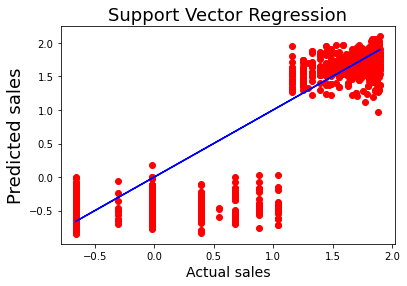

In [101]:
plt.scatter(x=Y_test, y=predsvr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Support Vector Regression', fontsize=18)
plt.savefig('svr.png')
plt.show()

# Lasso Regressor

In [105]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [106]:
lasso=Lasso(alpha=0.001,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(Y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))

R2_Score: 0.8949426193065603
MAE: 0.20884041032552816
MSE: 0.10809544699538413
RMSE: 0.32877872041144046


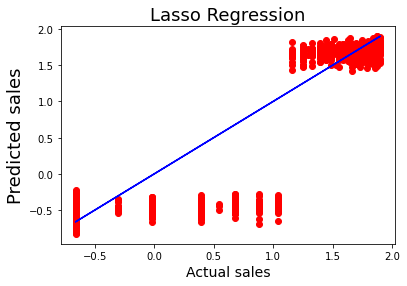

In [107]:
plt.scatter(x=Y_test, y=pred_lasso, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Lasso Regression', fontsize=18)
plt.savefig('lasso.png')
plt.show()

# Ridge Regressor

In [108]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.01, 'solver': 'sag'}


In [109]:
ridge=Ridge(alpha=0.01,solver='sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge=ridge.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(Y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))

R2_Score: 0.8948939221325247
MAE: 0.20893174672488835
MSE: 0.10814555240216316
RMSE: 0.32885491086824775


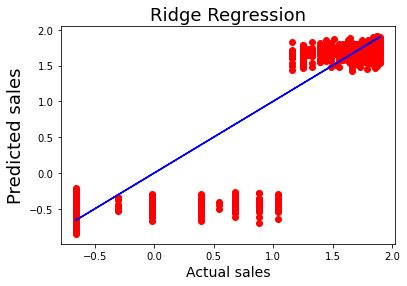

In [110]:
plt.scatter(x=Y_test, y=pred_ridge, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Ridge Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Checking cross validation score

In [111]:
rfscore=cross_val_score(LR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 89.16621233254867


In [112]:
rfscore=cross_val_score(DTR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 82.10712086578809


In [113]:
rfscore=cross_val_score(KNR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 82.96447192970385


In [114]:
rfscore=cross_val_score(svr, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 89.02017728803095


In [115]:
rfscore=cross_val_score(lasso, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 89.17303399837397


In [116]:
rfscore=cross_val_score(ridge, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 89.16769029382546


# Ensemble Technique

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [119]:
rf=RandomForestRegressor(criterion="mse",max_features='auto')
rf.fit(X_train,Y_train)
train_r2=rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
print('Training r2',train_r2)

rfs=r2_score(Y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9883261333276336
R2 Score: 91.79460653089424
Cross Val Score: 91.00131836918945


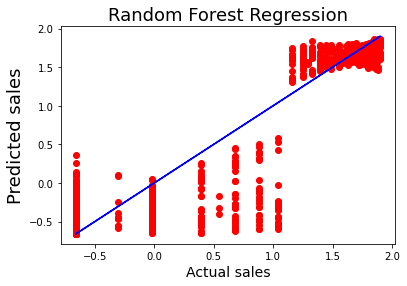

In [120]:
plt.scatter(x=Y_test, y=pred_decision, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Random Forest Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Saving the best model

In [122]:
import joblib

joblib.dump(rf,'Rainfall.obj')

Rainfall_loadmodel=joblib.load('Rainfall.obj')
prediction=Rainfall_loadmodel.predict(X_test)
prediction

array([-0.62175826, -0.61762312, -0.43038737, ..., -0.52302467,
       -0.56749812, -0.04571022])

In [123]:
conclusion=pd.DataFrame([Rainfall_loadmodel.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0         1         2         3         4         5     \
Predicted -0.621758 -0.617623 -0.430387 -0.401297 -0.542503 -0.551971   
Original  -0.621758 -0.617623 -0.430387 -0.401297 -0.542503 -0.551971   

               6         7         8         9     ...      2427      2428  \
Predicted -0.606766 -0.613062 -0.646915 -0.602015  ... -0.521692  1.707097   
Original  -0.606766 -0.613062 -0.646915 -0.602015  ... -0.521692  1.707097   

               2429      2430      2431      2432      2433      2434  \
Predicted  1.776178 -0.551624  1.778308 -0.340092 -0.533581 -0.523025   
Original   1.776178 -0.551624  1.778308 -0.340092 -0.533581 -0.523025   

               2435     2436  
Predicted -0.567498 -0.04571  
Original  -0.567498 -0.04571  

[2 rows x 2437 columns]

# Classification

# Splitting dataset into two parts: Input and Target Variable

In [124]:
x = df1.drop("RainTomorrow", axis=1)
x

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0          1.0     13.4  22.900000  0.677035     0.048093 -0.082709   
1          1.0      7.4  25.100000 -0.659667     0.048093 -0.082709   
2          1.0     12.9  25.700000 -0.659667     0.048093 -0.082709   
3          1.0      9.2  28.000000 -0.659667     0.048093 -0.082709   
4          1.0     17.5  32.300000  1.038925     0.048093 -0.082709   
...        ...      ...        ...       ...          ...       ...   
8420       9.0      2.8  23.400000 -0.659667     0.048093 -0.082709   
8421       9.0      3.6  25.300000 -0.659667     0.048093 -0.082709   
8422       9.0      5.4  26.900000 -0.659667     0.048093 -0.082709   
8423       9.0      7.8  27.000000 -0.659667     0.048093 -0.082709   
8424       9.0     14.9  23.859976 -0.659667     0.048093 -0.082709   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0            13.0       0.394268        13.0        14.0  ...       1007.7   
1            14.0       0.394268         6.0        15.0  ...       1010.6   
2            15.0       0.529217        13.0        15.0  ...       1007.6   
3             4.0      -1.258863         9.0         0.0  ...       1017.6   
4            13.0       0.183934         1.0         7.0  ...       1010.8   
...           ...            ...         ...         ...  ...          ...   
8420          0.0      -0.601802         9.0         1.0  ...       1024.6   
8421          6.0      -1.469455         9.0         3.0  ...       1023.5   
8422          3.0      -0.113140         9.0        14.0  ...       1021.0   
8423          9.0      -0.869984        10.0         3.0  ...       1019.4   
8424          3.0       0.037937         2.0         2.0  ...       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
0          1007.1  8.000000  4.503183     16.9     21.8        0.0  2008   
1          1007.8  4.566622  4.503183     17.2     24.3        0.0  2008   
2          1008.7  4.566622  2.000000     21.0     23.2        0.0  2008   
3          1012.8  4.566622  4.503183     18.1     26.5        0.0  2008   
4          1006.0  7.000000  8.000000     17.8     29.7        0.0  2008   
...           ...       ...       ...      ...      ...        ...   ...   
8420       1020.3  4.566622  4.503183     10.1     22.4        0.0  2017   
8421       1019.1  4.566622  4.503183     10.9     24.5        0.0  2017   
8422       1016.8  4.566622  4.503183     12.5     26.1        0.0  2017   
8423       1016.5  3.000000  2.000000     15.1     26.0        0.0  2017   
8424       1017.9  8.000000  8.000000     15.0     20.9        0.0  2017   

      Month  Day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  
8424      6   25  

[8121 rows x 24 columns]

In [126]:
x.shape

(8121, 24)

In [125]:
y=df1['RainTomorrow']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 8121, dtype: float64

In [127]:
y.shape

(8121,)

# Scaling

In [128]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.510278  0.040018 -0.156383  0.682200     0.059788 -0.091645   
1    -1.510278 -1.078689  0.211298 -0.656870     0.059788 -0.091645   
2    -1.510278 -0.053208  0.311574 -0.656870     0.059788 -0.091645   
3    -1.510278 -0.743077  0.695968 -0.656870     0.059788 -0.091645   
4    -1.510278  0.804467  1.414616  1.044731     0.059788 -0.091645   
...        ...       ...       ...       ...          ...       ...   
8116  1.026165 -1.936364 -0.072819 -0.656870     0.059788 -0.091645   
8117  1.026165 -1.787204  0.244723 -0.656870     0.059788 -0.091645   
8118  1.026165 -1.451591  0.512127 -0.656870     0.059788 -0.091645   
8119  1.026165 -1.004109  0.528840 -0.656870     0.059788 -0.091645   
8120  1.026165  0.319694  0.004056 -0.656870     0.059788 -0.091645   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0        1.232208       0.420358    1.248715    1.398454  ...    -1.663855   
1        1.444765       0.420358   -0.277269    1.624452  ...    -1.180640   
2        1.657323       0.558419    1.248715    1.624452  ...    -1.680517   
3       -0.680806      -1.270906    0.376725   -1.765517  ...    -0.014260   
4        1.232208       0.205171   -1.367257   -0.183531  ...    -1.147315   
...           ...            ...         ...         ...  ...          ...   
8116    -1.531034      -0.598689    0.376725   -1.539519  ...     1.152121   
8117    -0.255691      -1.486356    0.376725   -1.087523  ...     0.968833   
8118    -0.893363      -0.098755    0.376725    1.398454  ...     0.552268   
8119     0.381980      -0.873056    0.594722   -1.087523  ...     0.285667   
8120    -0.893363       0.055807   -1.149259   -1.313521  ...     0.418967   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
0       -1.381540  1.412030  0.002054 -0.154676 -0.106833  -0.553595   
1       -1.263483  0.000513  0.002054 -0.100454  0.322496  -0.553595   
2       -1.111696  0.000513 -1.086515  0.586360  0.133591  -0.553595   
3       -0.420223  0.000513  0.002054  0.062213  0.700305  -0.553595   
4       -1.567057  1.000914  1.522730  0.007990  1.249846  -0.553595   
...           ...       ...       ...       ...       ...        ...   
8116     0.844668  0.000513  0.002054 -1.383710 -0.003794  -0.553595   
8117     0.642286  0.000513  0.002054 -1.239118  0.356842  -0.553595   
8118     0.254386  0.000513  0.002054 -0.949933  0.631613  -0.553595   
8119     0.203790 -0.643550 -1.086515 -0.480009  0.614440  -0.553595   
8120     0.439903  1.412030  1.522730 -0.498083 -0.261392  -0.553595   

          Year     Month       Day  
0    -1.657662  1.624159 -1.672220  
1    -1.657662  1.624159 -1.558539  
2    -1.657662  1.624159 -1.444858  
3    -1.657662  1.624159 -1.331177  
4    -1.657662  1.624159 -1.217496  
...        ...       ...       ...  
8116  1.998800 -0.122178  0.601399  
8117  1.998800 -0.122178  0.715080  
8118  1.998800 -0.122178  0.828761  
8119  1.998800 -0.122178  0.942442  
8120  1.998800 -0.122178  1.056123  

[8121 rows x 24 columns]

# Checking VIF

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.579507       Location
1     8.692984        MinTemp
2    25.599594        MaxTemp
3     9.442112       Rainfall
4     1.557251    Evaporation
5     2.040824       Sunshine
6     1.609300    WindGustDir
7     2.345090  WindGustSpeed
8     1.368602     WindDir9am
9     1.492271     WindDir3pm
10    2.004254   WindSpeed9am
11    2.013351   WindSpeed3pm
12    4.066939    Humidity9am
13    5.492010    Humidity3pm
14   19.564144    Pressure9am
15   18.581454    Pressure3pm
16    1.957159       Cloud9am
17    1.837903       Cloud3pm
18   17.334782        Temp9am
19   32.408780        Temp3pm
20    8.754484      RainToday
21    1.524717           Year
22    1.154662          Month
23    1.004121            Day

In [130]:
# Dropping Temp3pm, Temp9am column
x.drop("Temp3pm",axis=1,inplace=True)
x.drop("Temp9am",axis=1,inplace=True)

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.576762       Location
1     4.724766        MinTemp
2     5.642263        MaxTemp
3     9.434275       Rainfall
4     1.551413    Evaporation
5     2.032669       Sunshine
6     1.604454    WindGustDir
7     2.289245  WindGustSpeed
8     1.368006     WindDir9am
9     1.489599     WindDir3pm
10    1.989035   WindSpeed9am
11    1.968894   WindSpeed3pm
12    2.562932    Humidity9am
13    2.907192    Humidity3pm
14   18.881752    Pressure9am
15   18.038125    Pressure3pm
16    1.935256       Cloud9am
17    1.825032       Cloud3pm
18    8.753312      RainToday
19    1.500762           Year
20    1.125749          Month
21    1.003623            Day

In [132]:
x.drop("Pressure9am",axis=1,inplace=True)

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.576572       Location
1     4.508137        MinTemp
2     5.392886        MaxTemp
3     9.416699       Rainfall
4     1.538233    Evaporation
5     2.026157       Sunshine
6     1.589817    WindGustDir
7     2.270418  WindGustSpeed
8     1.345251     WindDir9am
9     1.418783     WindDir3pm
10    1.983664   WindSpeed9am
11    1.955272   WindSpeed3pm
12    2.560756    Humidity9am
13    2.907191    Humidity3pm
14    1.426270    Pressure3pm
15    1.934494       Cloud9am
16    1.823880       Cloud3pm
17    8.753300      RainToday
18    1.499711           Year
19    1.125418          Month
20    1.002989            Day

# OverSampling

In [134]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [135]:
y.value_counts()

0.0    6212
1.0    6212
Name: RainTomorrow, dtype: int64

# Finding the best random state

In [136]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.7915772532188842  on Random_state  143


# Creating train_test_split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [138]:
x_train.shape

(8696, 21)

In [139]:
x_test.shape

(3728, 21)

In [140]:
y_train.shape

(8696,)

In [141]:
y_test.shape

(3728,)

# Logistic Regression

In [142]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 79.15772532188842
[[1468  387]
 [ 390 1483]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1855
         1.0       0.79      0.79      0.79      1873

    accuracy                           0.79      3728
   macro avg       0.79      0.79      0.79      3728
weighted avg       0.79      0.79      0.79      3728



In [143]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.714836037156919


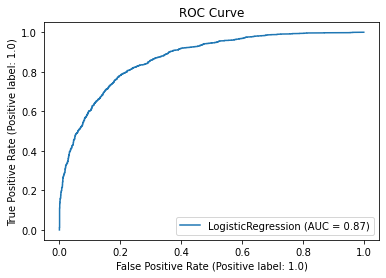

In [144]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

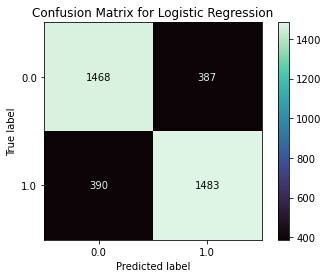

In [145]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# DecisionTree Classifier

In [146]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 86.56115879828327
[[1593  262]
 [ 239 1634]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1855
         1.0       0.86      0.87      0.87      1873

    accuracy                           0.87      3728
   macro avg       0.87      0.87      0.87      3728
weighted avg       0.87      0.87      0.87      3728



In [147]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.7254480506225759


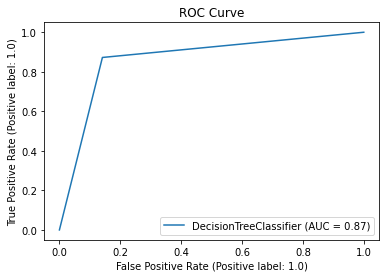

In [148]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

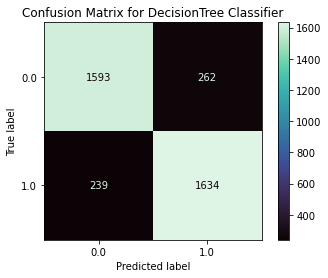

In [149]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# KNeighbors Classifier

In [150]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 85.83690987124464
[[1405  450]
 [  78 1795]]
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      1855
         1.0       0.80      0.96      0.87      1873

    accuracy                           0.86      3728
   macro avg       0.87      0.86      0.86      3728
weighted avg       0.87      0.86      0.86      3728



In [151]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.7250510146223557


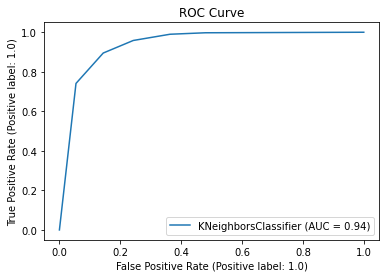

In [152]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

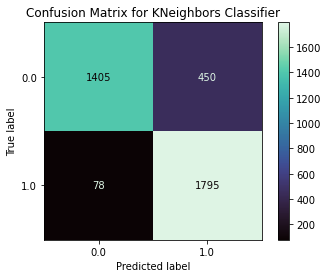

In [153]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector Classifier

In [154]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 85.83690987124464
[[1534  321]
 [ 207 1666]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1855
         1.0       0.84      0.89      0.86      1873

    accuracy                           0.86      3728
   macro avg       0.86      0.86      0.86      3728
weighted avg       0.86      0.86      0.86      3728



In [156]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.7327013611459416


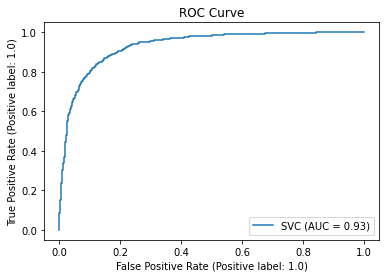

In [157]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sv, x_test, y_test)
plt.title("ROC Curve")
plt.show()

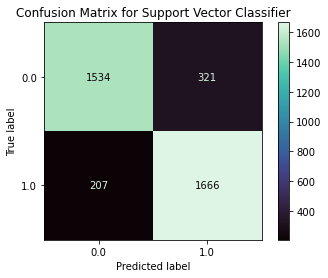

In [158]:
metrics.plot_confusion_matrix(sv, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Ensemble Technique

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 93.26716738197425
[[1710  145]
 [ 106 1767]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1855
         1.0       0.92      0.94      0.93      1873

    accuracy                           0.93      3728
   macro avg       0.93      0.93      0.93      3728
weighted avg       0.93      0.93      0.93      3728



In [160]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.7855018678901103


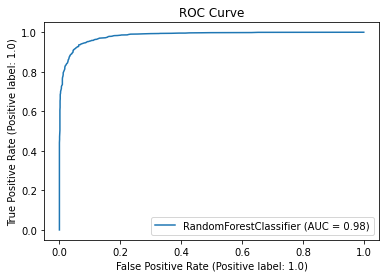

In [161]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

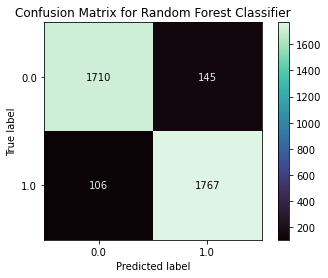

In [162]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [163]:
RandomForestClassifier()

RandomForestClassifier()

In [164]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [165]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [166]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [167]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [168]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [169]:
RandomForestClassifier()

RandomForestClassifier()

In [170]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500)

In [171]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8583690987124464

# Saving the best model

In [172]:
import joblib

joblib.dump(rf,'RainTomorrow.obj')

RainTomorrow_loadmodel=joblib.load('RainTomorrow.obj')
RainTomorrow_loadmodel.predict(x_test)

array([1., 1., 1., ..., 0., 1., 0.])

In [173]:
conclusion=pd.DataFrame([RainTomorrow_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted   1.0   1.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0  ...   
Original    1.0   1.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0  ...   

           3718  3719  3720  3721  3722  3723  3724  3725  3726  3727  
Predicted   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   0.0  
Original    0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   0.0  

[2 rows x 3728 columns]